# Proyecto - Cadena de gimnasios Model Fitness

## Descripción del proyecto
La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

## Diccionario de datos

* 'Churn' — la cancelación para el mes en cuestión

* Datos del usuario del mes anterior 
    * 'gender' - Genero del usuario/usuaria.
    * 'Near_Location' — si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio.
    * 'Partner' — si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes).
    * Promo_friends — si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono).
    * 'Phone' — si el/la usuario/a aportó el número de teléfono.
    * 'Age' - edad del usuario/usuaria.
    * 'Lifetime' — el tiempo (en meses) desde que el/la usuario/a llegó por primera vez al gimnasio.

* Datos del registro de visitas y compras y datos sobre el estado actual de la membresía
    * 'Contract_period' — 1 mes, 3 meses, 6 meses o 1 año.
    * 'Month_to_end_contract' — los meses que faltan hasta que expire el contrato.
    * 'Group_visits' — si el/la usuario/a participa en sesiones grupales.
    * 'Avg_class_frequency_total' — frecuencia media de visitas por semana a lo largo de la vida del cliente.
    * 'Avg_class_frequency_current_month' — frecuencia media de visitas por semana durante el mes en curso.
    * 'Avg_additional_charges_total' — cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.

## Librerías 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Análisis exploratorio de los datos (EDA)

### Observar el dataset

In [4]:
df_gym = pd.read_csv('./datasets/gym_churn_us.csv')

In [3]:
print('El tamaño del DF es:' ,df_gym.shape)
df_gym.head(5)

El tamaño del DF es: (4000, 14)


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
df_gym.info()
df_gym.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [5]:
# contar valores duplicados
duplicados = df_gym.duplicated().sum()
duplicados

0

In [6]:
# contar valores ausentes
ausentes = df_gym.isna().sum()
ausentes

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

<span style="color:purple; font-weight:bold; font-size:20px">
Al hacer un pre procesamiento de datos no se encontraron valores ausentes ni duplicados en el DataSet, sin embargo es importante mencionar que la mayoria de las columnas son categóricas y contienen datos 0 y 1, los cuales seran considerados de la siguiente forma:  0 = False y 1 = True, en el caso de la columna 'gender' 0 = genero 1 y 1 = genero 2, ya que no se cuenta con la suficiente información para determinar la clasificación real de cada uno de los valores. 
</span>

### Valores medios de dos grupos: personas que cancelaron y personas que se quedaron

In [7]:
# filtrar personas que cancelaron
cancelacion = df_gym.query('Churn == 1')
print('Total de usuarios que cancelaron: ',cancelacion['Churn'].count())

Total de usuarios que cancelaron:  1061


In [8]:
retencion = df_gym.query('Churn == 0')
print('Total de usuarios que se quedaron: ',retencion['Churn'].count())

Total de usuarios que se quedaron:  2939


In [9]:
df_filtrado = df_gym.groupby('Churn').mean()
df_filtrado

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


<span style="color:purple; font-weight:bold; font-size:20px">
Al filtrar el Dataset por la columna 'Churn' los valores se consideraron de la siguiente forma: 0 = el usuario se quedo, 1 = el usuario canceló. 
</span>

In [10]:
print(df_gym.columns)

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')


In [11]:
# caracteristicas 
caracteristicas = [
    'gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month'
]

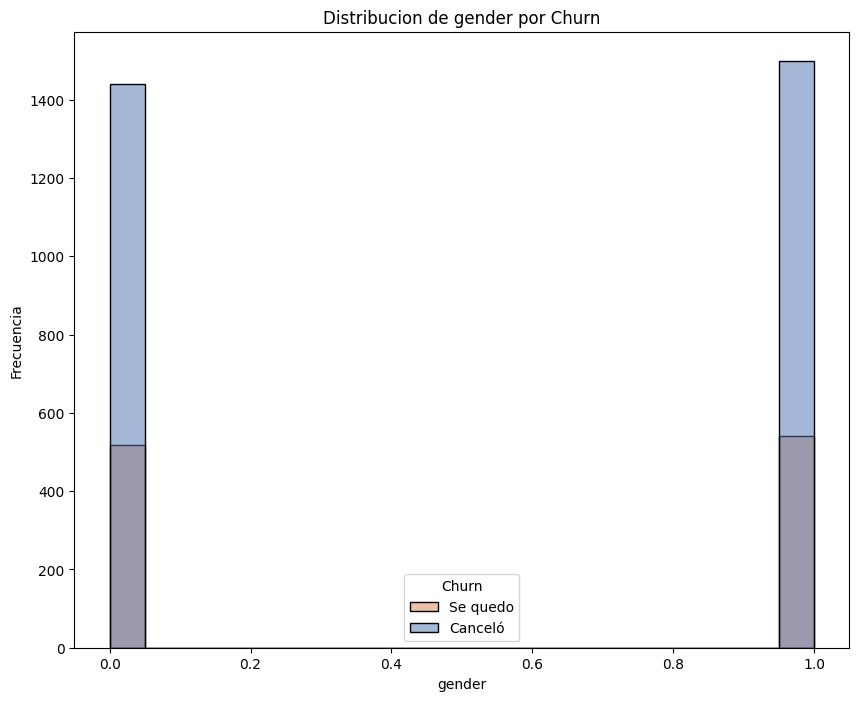

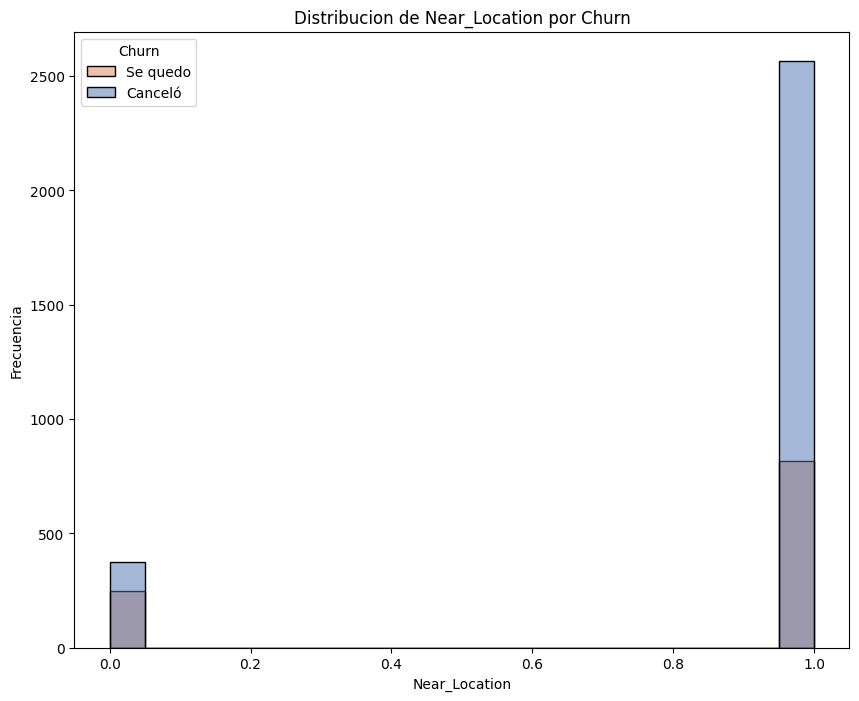

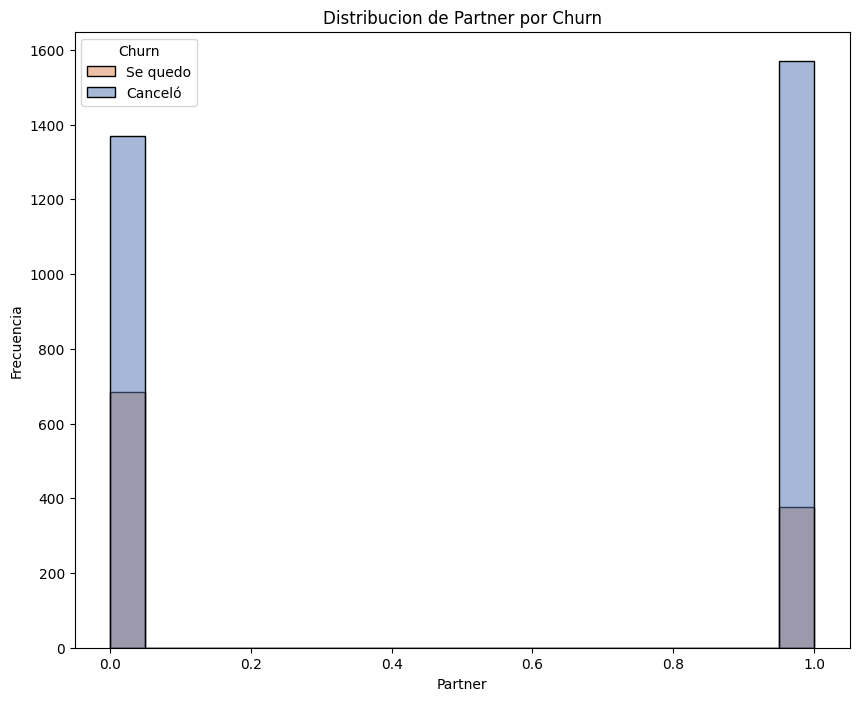

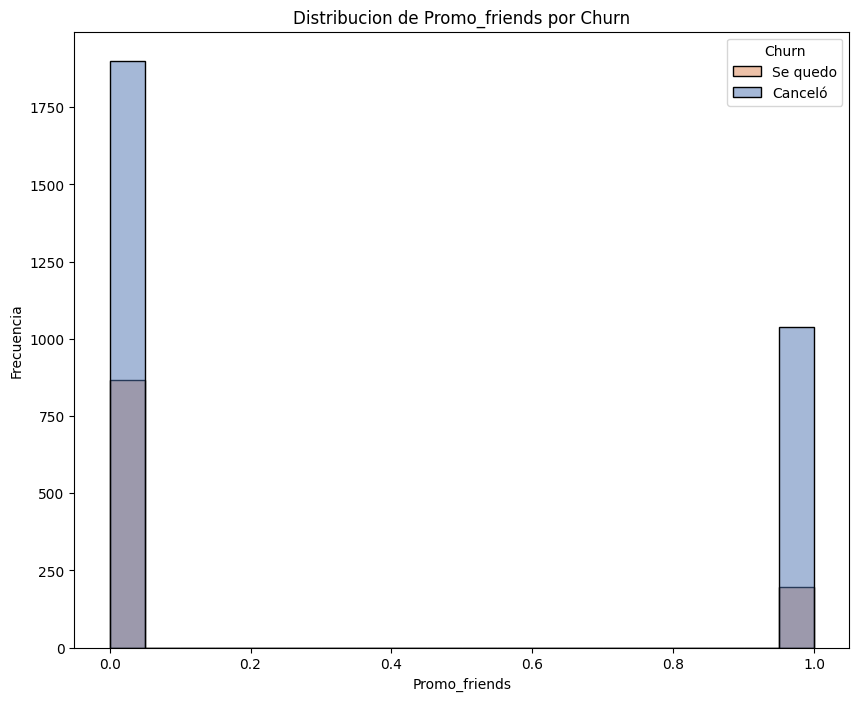

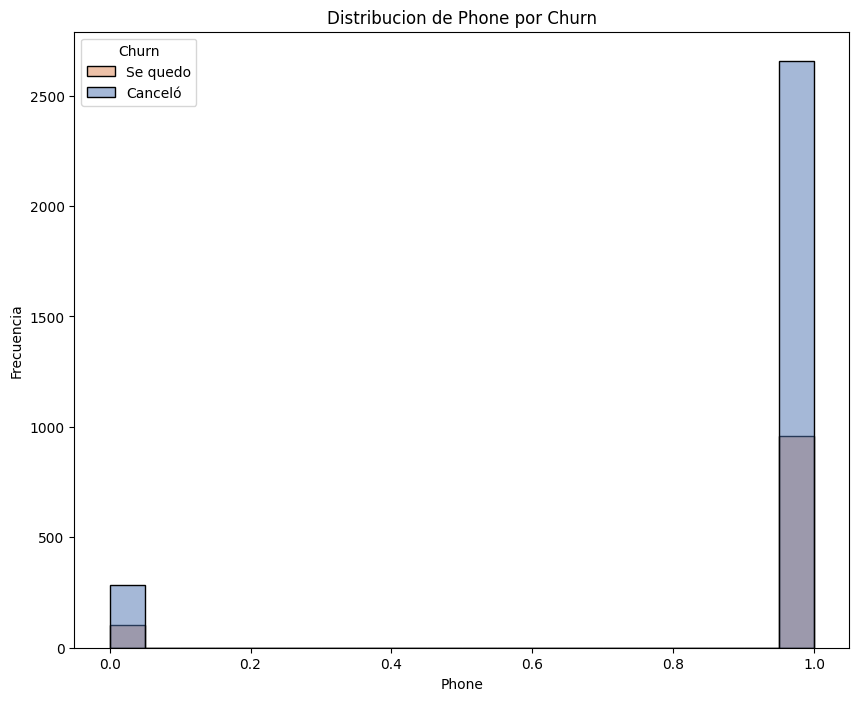

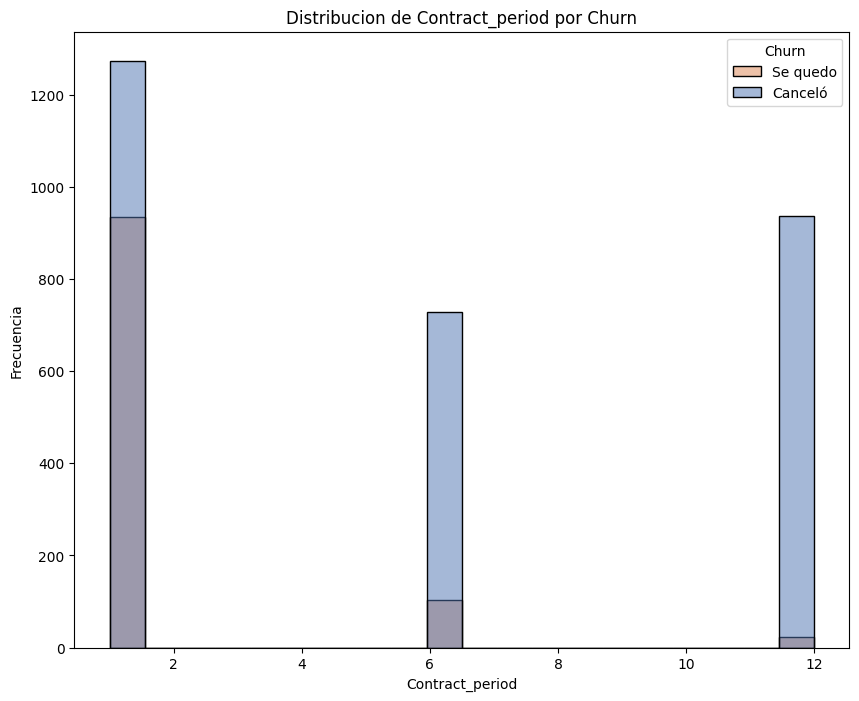

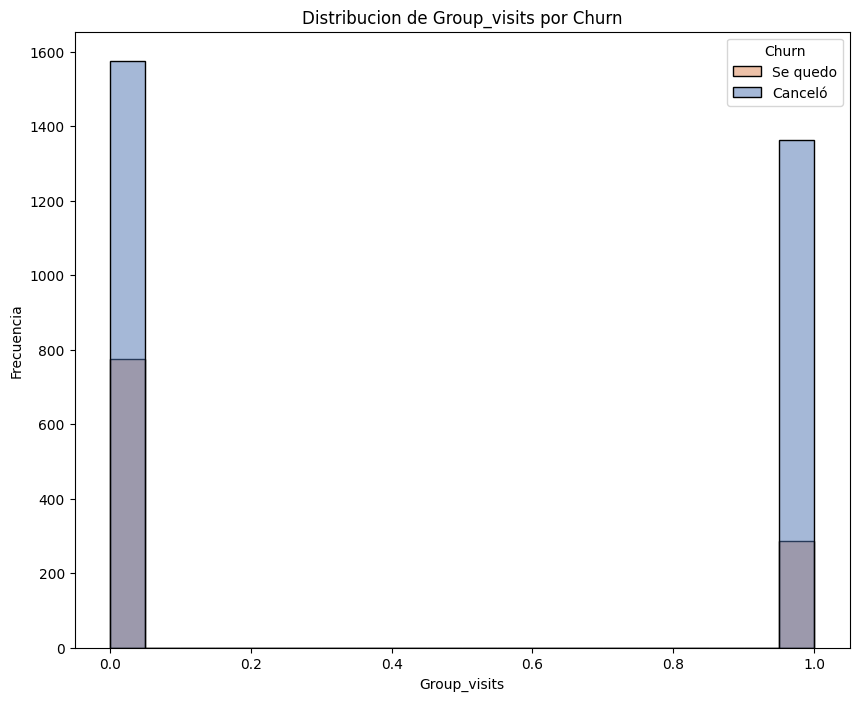

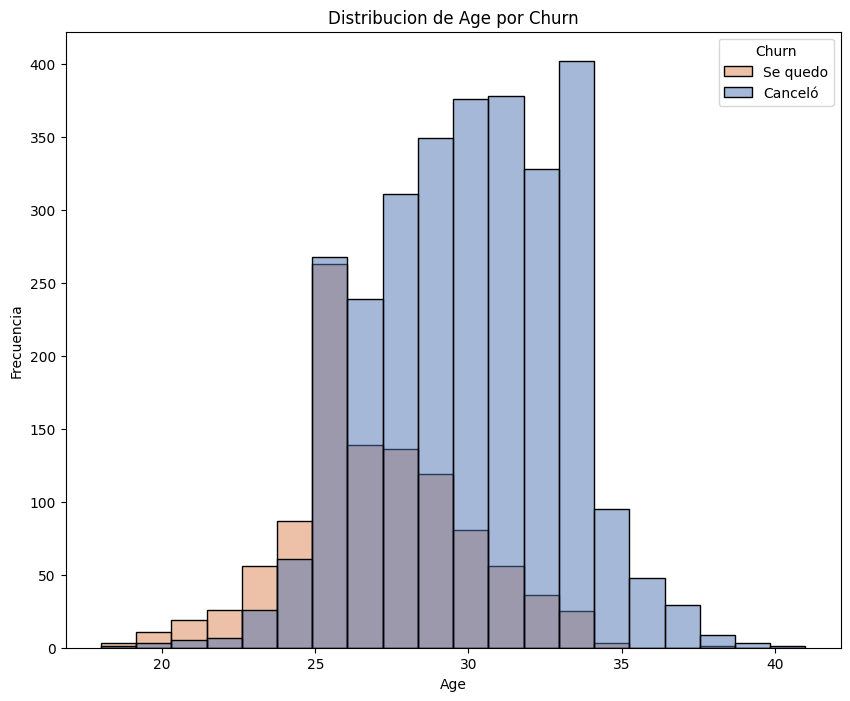

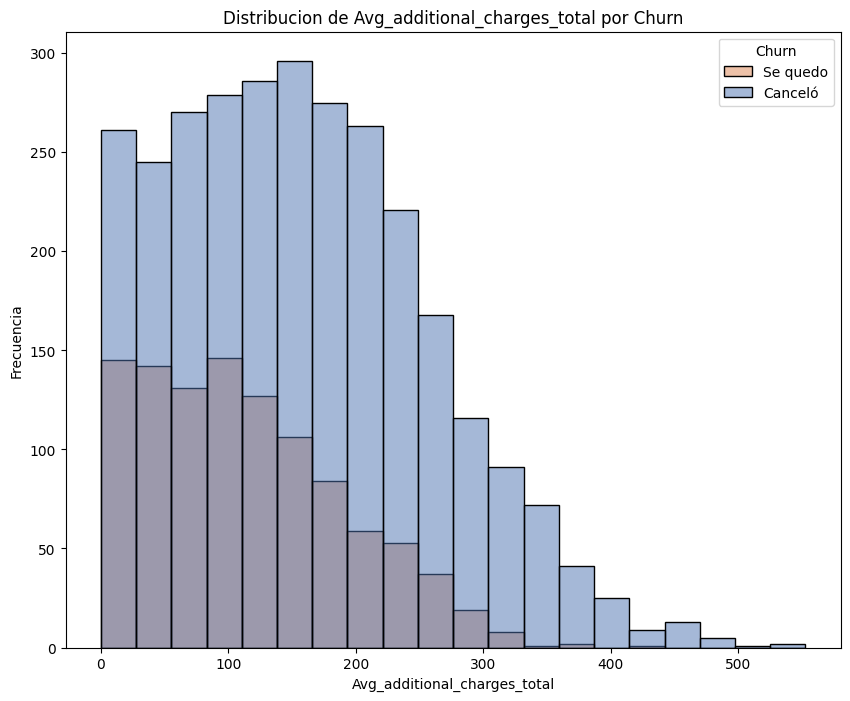

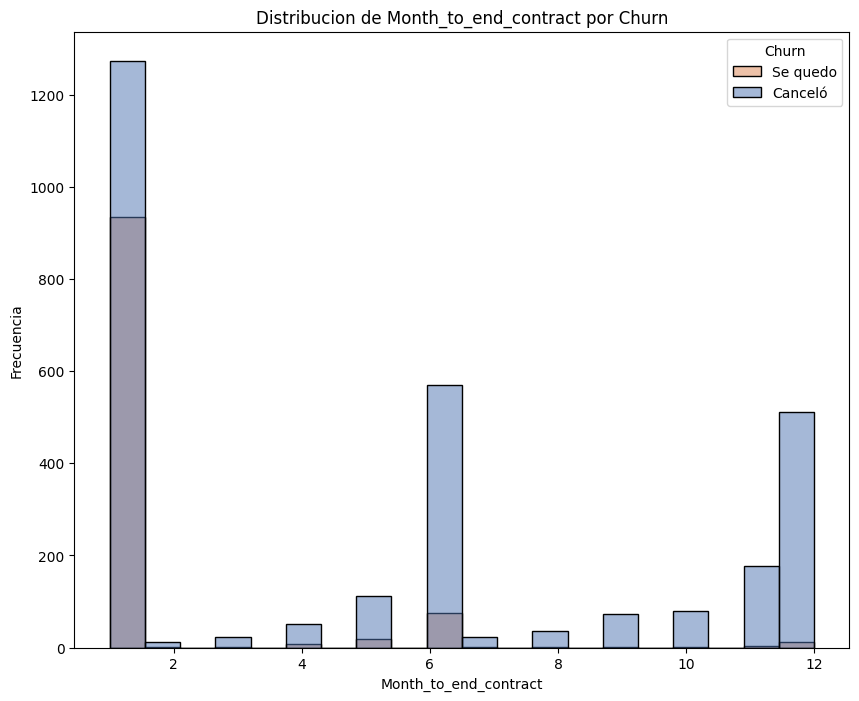

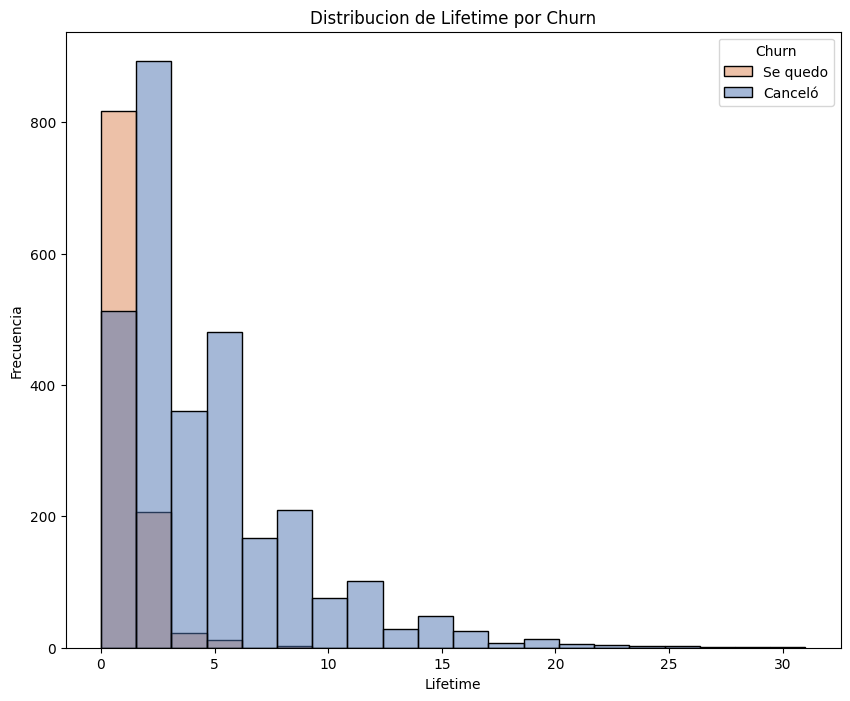

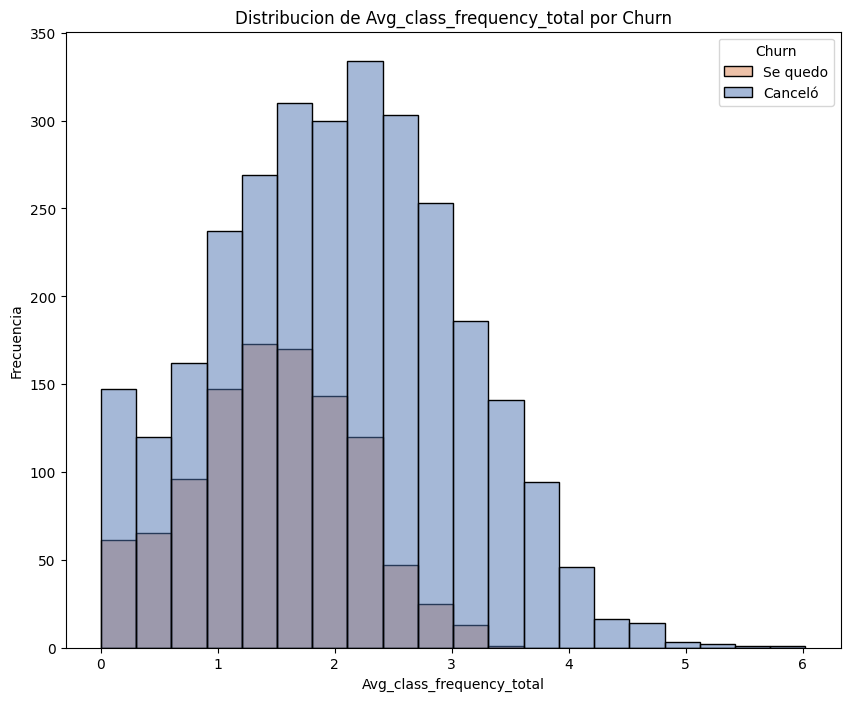

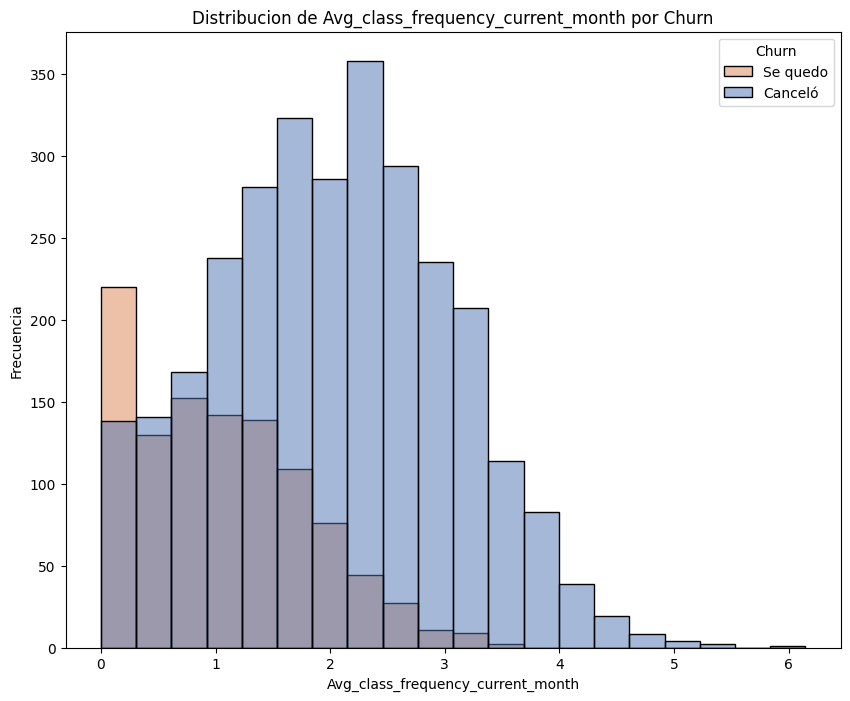

In [12]:
# trazar histograma 
for columna in caracteristicas:
    plt.figure(figsize=(10,8))
    sns.histplot(data=df_gym, x=columna, hue='Churn', bins=20, kde=False, palette='deep')
    plt.title(f'Distribucion de {columna} por Churn')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.legend(title='Churn', labels=['Se quedo', 'Canceló'])
    plt.show()

<span style="color:purple; font-weight:bold; font-size:20px">
En los graficos de distribución solo en algunos se observa la frecuencia de usuarios que se quedaron en el gym, mientras que la mayoria de las columnas muestra una gran cantidad de usuarios que cancelaron. Es importante considerar aquellos que muestran una ligera disatribucion de usuarios leales ya que se podrían tomar en cuenta para crear una estrategia de retención. 
</span>

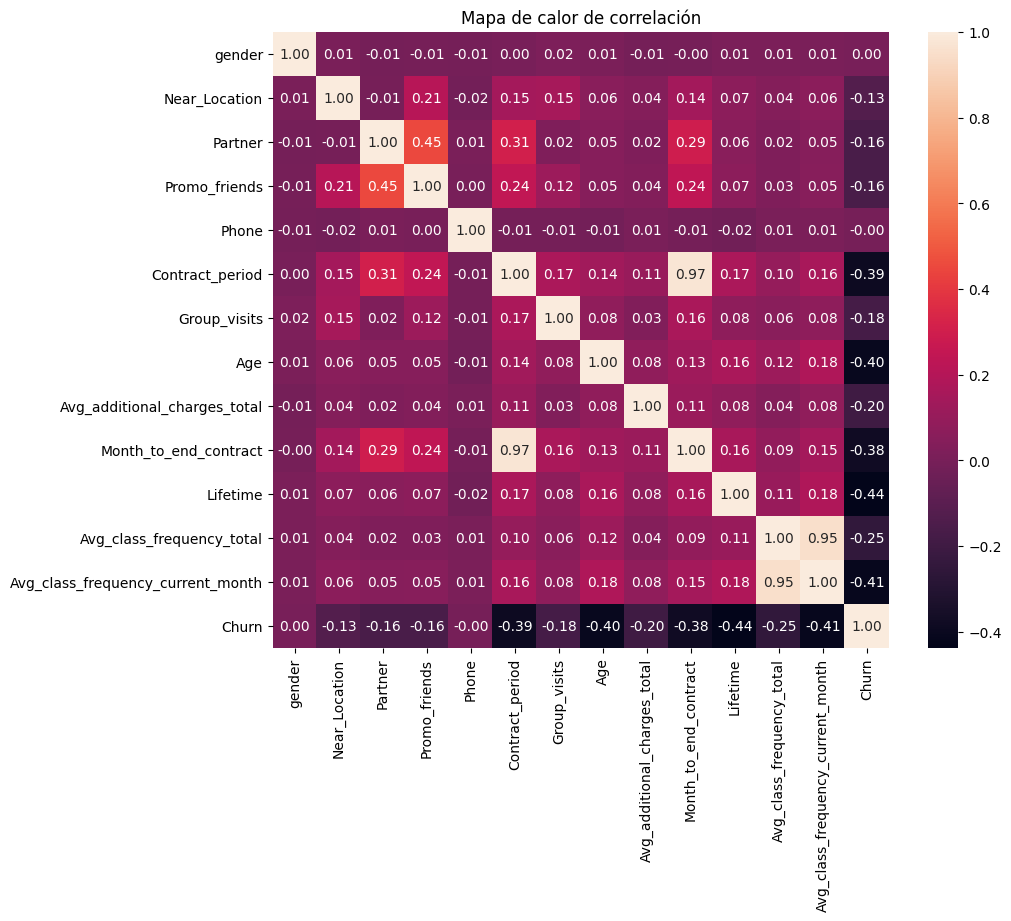

In [13]:
# construir una matriz de correlacion 
cm = df_gym.corr()
fig, ax = plt.subplots(figsize=(10,8))

# trazar mapa de calor 
sns.heatmap(cm, annot=True, square=True, fmt=".2f")
plt.title("Mapa de calor de correlación")
plt.show()

<span style="color:purple; font-weight:bold; font-size:20px">
En cuanto al mapa de calor se logra observar una correlación fuerte entre algunas variables, por ejemplo, el mes de fin de contratro y genero, la frecuencia de visitas por mes y la frecuencia de visitas por semana.
</span>

## Construir un modelo para predecir la cancelación de usuarios

### Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.

In [14]:
# relacion entre las clases del dataset
print('Relación entre las clases:\n', df_gym['Churn'].value_counts())

Relación entre las clases:
 0    2939
1    1061
Name: Churn, dtype: int64


In [15]:
# dividir los datos en caracteristicas
X = df_gym.drop(columns=['Churn'])
y = df_gym['Churn']

### Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().

In [16]:
# dividir los datos en entrenamiento y prueba 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
# crear objeto StandarScaler y aplicarlo al set de entrenamiento
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)

# aplicar la estandarizacion a la matriz del set de prueba 
X_test_st = scaler.transform(X_test)

### Entrena el modelo en el set de entrenamiento con dos métodos:
   * regresión logística;
   * bosque aleatorio.

In [18]:
# definir el algoritmo para el modelo de regresion logistica 
lr_model = LogisticRegression(random_state=0)
# entrenar al modelo 
lr_model.fit(X_train_st, y_train)
# utilizar el modelo entrenado para hacer previsiones
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

In [19]:
# define el algoritmo para el nuevo modelo de random forest
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# entrenar al modelo
rf_model.fit(X_train_st, y_train)
# utilizar el modelo entrenado para hacer previsiones
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

### Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?

In [20]:
# definir funcion para mostrar metricas 
def print_metrics(y_true, y_pred, y_proba, title = 'Metricas de clasificación'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [21]:
print_metrics(y_test, lr_predictions, lr_probabilities , title='Métricas de regresión logística:')
print_metrics(y_test, rf_predictions, rf_probabilities, title='Métricas de random forest:')

Métricas de regresión logística:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
Métricas de random forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81


<span style="color:purple; font-weight:bold; font-size:20px">
Al observar los resultados de las métricas obtenidas en los dos modelos se concluye que: en ambos modelos la Exactitud(Accuracy) es la misma, en la Precisión hay una ligera ventaja en la regresión logistica la cual obtuvo un 0.85 frente a 0.84 en el random forest, lo que indica que la regresion fue mejor para evitar falsos positivos. Por ultimo, en Recall la regresión nuevamente supera al modelo random forest obteniendo un 0.83 frente al 0.81. Esto implica que la regresión identifica de mejor manera los casos positivos. Por lo cual la regresion es la mejor opción en este momento.
</span>

## Crear clústeres de usuarios/as

### Deja de lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios/as)

In [22]:
# seleccionar columnas del comportamiento de usuario en el gym 
avg_columns = df_gym[['Avg_class_frequency_total', 
                       'Avg_class_frequency_current_month', 
                       'Avg_additional_charges_total']]

### Estandariza los datos.

In [23]:
# estandarizar los datos 
sc = StandardScaler()
x_sc_avg = sc.fit_transform(avg_columns)

### Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma

In [24]:
# funcion linkage
linked_avg = linkage(x_sc_avg, method='ward')

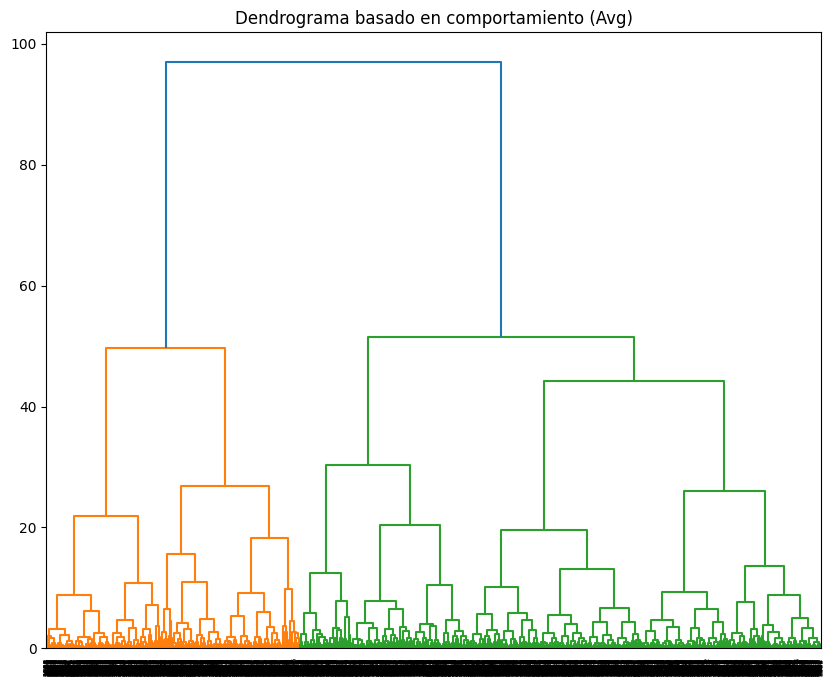

In [25]:
# Trazar dendrograma para las columnas de promedio
plt.figure(figsize=(10, 8))
dendrogram(linked_avg, orientation='top')
plt.title('Dendrograma basado en comportamiento (Avg)')
plt.show()

### Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. 

In [26]:
# definir el modelo
model_cluster = KMeans(n_clusters = 5)

# predice los clusters para las observaciones 
labels = model_cluster.fit_predict(x_sc_avg)

In [27]:
# crear copia de avg_columns
avg_columns = avg_columns.copy()
# almacenar etiquetas de cluster en el conjunto de datos
avg_columns['clusters'] = labels

In [28]:
avg_columns

,Avg_class_frequency_total,Avg_class_frequency_current_month,Avg_additional_charges_total,clusters
0,0.020398,0.000000,14.227470,1
1,1.922936,1.910244,113.202938,3
2,1.859098,1.736502,129.448479,3
3,3.205633,3.357215,62.669863,4
4,1.113884,1.120078,198.362265,2
...,...,...,...,...
3995,2.284497,2.349070,2.406023,3
3996,1.277168,0.292859,68.883764,1
3997,2.786146,2.831439,78.250542,4
3998,1.630108,1.596237,61.912657,3


### Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?

In [29]:
# valores medios de las características por clúster
avg_columns.groupby(['clusters']).mean()

,Avg_class_frequency_total,Avg_class_frequency_current_month,Avg_additional_charges_total
clusters,,,
0,2.526300,2.511437,264.969409
1,0.873985,0.619288,80.494707
2,1.065325,0.939808,238.386796
3,2.015348,1.902993,89.352464
4,3.324940,3.327388,110.897889


<span style="color:purple; font-weight:bold; font-size:20px">
Al analizar los resultados de los valores promedios de los 5 clusters se pueden sacar las siguientes conclusiones: 

Cluster 0: cuenta con una frecuencia baja en el total de visitas por semana, de igual manera para las visitas al mes, pero sus gastos adicionales son moderados, lo que podria indicar que estan interesados en servicios adicionales aunque no visitan con tanta frecuencia las instalaciones. 

Cluster 1: este grupo esta compuesto por usuarios altamente activos en las visitas y con un alto gasto en servicios adicionales, esto representa clientes comprometidos y valiosos.
 
Cluster 2: este grupo cuenta con usuarios con una participacion moderada y un bajo gasto en servicios adicionales. Podrían ser clientes regulares, pero con menor rentabilidad para el Gym.
 
Cluster 3: Este grupo es el mas activo en cuanto a visitas al gimnasio, sin embargo los gastos a servicios a dicionales son más bajos en comparación con el cluster 1. Puede representar clientes comprometidos con los servicios básicos del gym.
 
Cluster 4: Este grupo está compuesto por usuarios inactivos tanto en asistencia a clases como en gastos adicionales. Podrían estar en riesgo de cancelar su membresía.
</span>

### Traza distribuciones de características para los clústeres. ¿Notas algo?

In [30]:
# define la función para representar gráficos de características pareadas para los clústeres
def show_clusters(df, x_name, y_name, cluster_name):
    plt.figure(figsize = (10,8))
    sns.scatterplot(x = df[x_name], y = df[y_name], hue = df[cluster_name], palette = 'Paired')
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

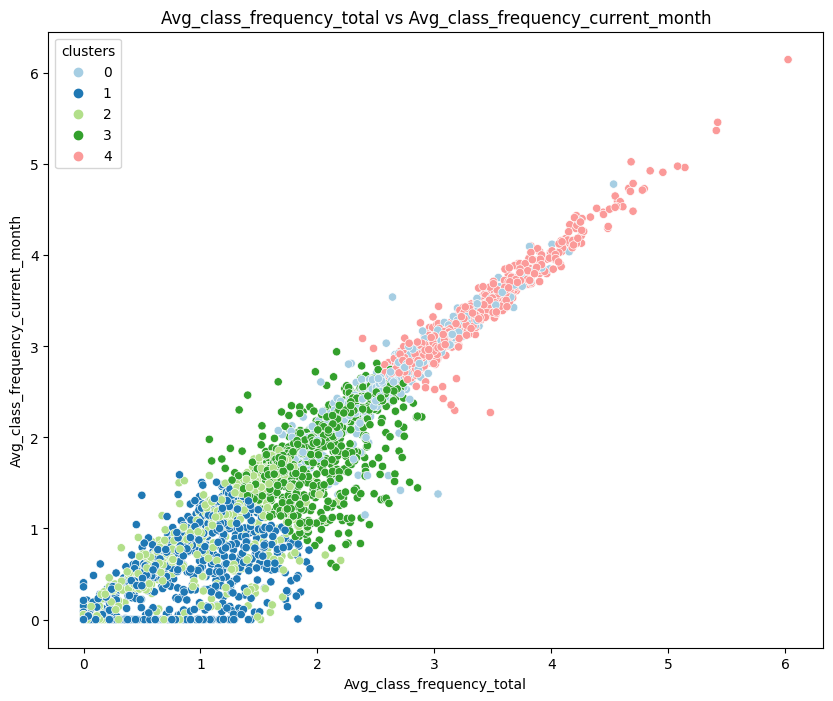

In [31]:
# mostrar grafico de frecuencia visitas totales por semana vs frecuencia de visitas al mes
show_clusters(avg_columns, 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'clusters')

<span style="color:purple; font-weight:bold; font-size:20px"> 
A partir del gráfico presentado, donde se comparan la frecuencia promedio de visitas totales y la frecuencia promedio de visitas en el mes actual para cada cluster, se pueden extraer las siguientes conclusiones:

1. Existe una fuerte correlacion positiva entre las dos variables. Esto indica, que las personas que tienen una alta frecuencia en visitas por semana también tienden a mantener una alta frecuencia de visitas durante el mes actual. 
    
2. Se logra diferenciar bien los clusteres en funcion de las dos variables, lo que indica que el modelo K-Means logro separar a los usuarios en grupos significativos. 
   
3. Confirmación de los promedios analizados anteriormente, el grafico muestra el mismo orden de los clusters como se concluyo en la tabla donde se muestran los promedios de cada uno de ellos, siendo los clusters 3 y 1 los que estan mas arriba en el grafico, lo que sugiere que son los grupos de clientes mas valiosos y consistentes. Por otra parte, los clusters 0 y 4 estan concentrados en la parte inferior, lo que refuerza la idea de que son los menos comprometidos con el gimnasio, siendo tambien los mas propensos a la cancelación. 
</span>

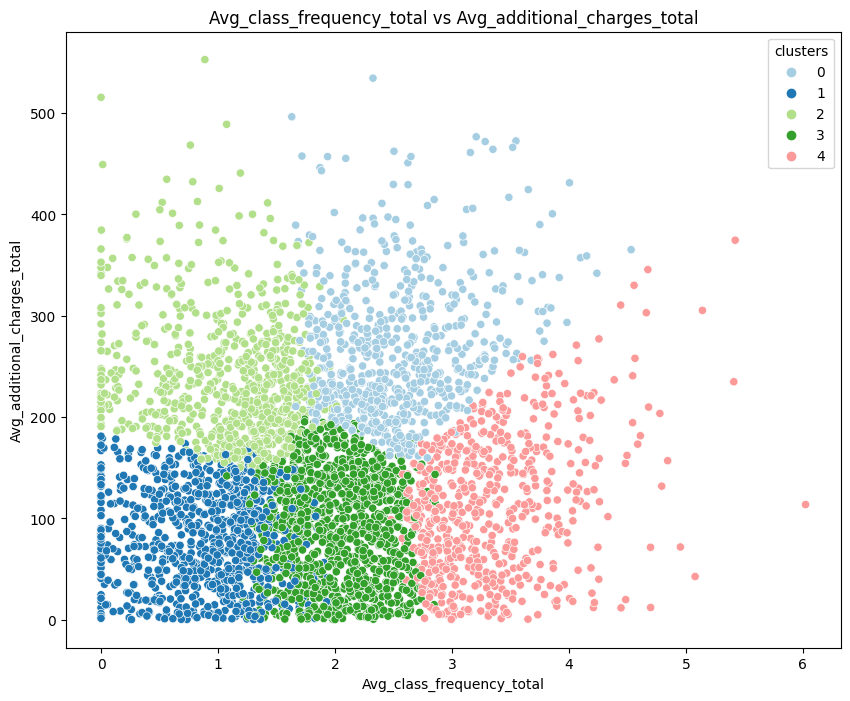

In [32]:
# mostrar grafico de frecuencia total de visita a la semana vs cantidad total de dinero gastado en servicios
show_clusters(avg_columns, 'Avg_class_frequency_total', 'Avg_additional_charges_total', 'clusters')

<span style="color:purple; font-weight:bold; font-size:20px"> 
En el grafico donde se compara la frecuencia promedio de visitas totales por semana y la cantidad promedio gastada en servicios se puede concluir que existe una relacion positiva entre estas dos variables, en donde los clusters 1 y 3 son los que representan a clientes con mayor gasto en servicios, sin embargo es importante mencionar, que en este grafico el cluster 1 es el grupo con los usuarios que tienen mas gastos en servicios. Por otra parte, los clusters 0 y 2 son los que cuentan con usuarios con gastos moderados en servicios adicionales en el gimnasio. Por Último se encuentra el cluster 4 que se mantiene nuevamente en la parte inferior del grafico, lo que indica que es el grupo mas propenso a abandorar ya que cuenta con usuarios con baja asistencia y gasto. 
</span>

### Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

In [33]:
# transferir la columna Churn al DF de clusters
avg_columns['Churn'] = df_gym['Churn']

In [34]:
# calcular promedio de usuarios que cancelaron
churn_rate_by_cluster = avg_columns.groupby('clusters')['Churn'].mean()

In [35]:
print(churn_rate_by_cluster)

clusters
0    0.092564
1    0.502304
2    0.267760
3    0.305235
4    0.039088
Name: Churn, dtype: float64


<span style="color:purple; font-weight:bold; font-size:20px"> 
Al calcular la tasa de retención de cada cluster se concluye lo siguiente:

Grupos leales:
Clusters 3 y 1 estos grupos tienen las tasas de cancelación más bajas (3.9% y 9.2%, respectivamente) y representan a los usuarios más activos y comprometidos. 
  
Clusters en riesgo: 
Cluster 4 y 2. Especialmente el cluster 4, con una alarmante tasa de cancelacion del 50.3%. Esto indica que los usuarios de este grupo necesitan una estrategia de retencion urgente, el cluster 2 cuenta con una tasa del 30.2%. 

Cluster 0: este grupo tiene una tasa de cancelación del 27.4%, aunque no se encuentra en un riesgo extremo, es necesario tomar medidas para mejorar el compromiso. 
</span>

## Conclusiones

<span style="color:purple; font-weight:bold; font-size:20px">
En conclusion el gimnasio cuenta con 2 grupos leales, los cuales representan a los usuarios mas comprometidos y activos. Es importante mantenerlos satisfechos para garantizar su continuidad. Por lo cual lanzar una campaña que recompense su lealtad podria ser una buena estrategia para seguir teniendo una buena respuesta por parte de estos grupos. 

Por ejemplo para el cluster 3 (3.9% - tasa de cancelacion) podria implementarse un programa de recompensas por su alta frecuencia de visitas, por ejemplo, ofrecer descuentos exclusivos, accesos prioritarios o membresias premium. Otra estrategia podria ser embajadores de marca, donde se les invite a programas de referidos para atraer nuevos clientes, por ejemplo, ofrecer una mensualidad por cada amigo referido que se inscriba. 

    
Para el cluster 1 (9.2% - tasa de cancelacion) el objetivo tendra que ser consolidar su lealtad y aumentar su compromiso con los servicios adicionales. Ofrecen promociones por tiempo limitado que refuercen el uso continuo del servicio, por ejemplo, pagar una cantidad de meses y obtener un descuento preferencial en el siguiente mes. Campaña de comunicación personalizada, enviar mensajes de agradecimiento o recordatorios para mantenerlos involucrados. 
    
Para los clusters 0 y 2 (27.4%, 30.2% - tasa cancelacion) el objetivo podria ser: mejorar su frecuencia de visitas y fortalecer su compromiso con la marca. Implementar encuestas de satisfaccion para entender que podria mejorar su experiencia, por ejemplo, responde la siguiente encuesta y gana una visita gratis. Implementar campaña de promociones dirigidas, ofrecer promociones atractivas basadas en su comportamiento de uso, por ejemplo, 30% de descuento en tu siguiente mensualidad si invitas a un amigo. 

Por otra parte para el cluster 4 (50.3% - tasa de cancelacion) el objetivo se centrara en estrategias intensivas de retencion, lanzar campañas especificas con descuentos significativos, por ejemplo, invitarlos a mantenerse en el gimnasio y ganar un 50% de descuento en su proxima mensualidad. Implementar beneficios del servicio con testimonios y estadísticas, por ejemplo, "El 80% de nuestros miembros notan mejoras significativas en 3 meses. ¡Tú puedes ser el próximo!”. Permitir pausas temporales o reembolsos parciales, por ejemplo, "Pausa tu membresia por un mes sin costo, y regresa cuando estes listo". 
   
Estas estrategias por cluster podrian maximizar las campañas de marketing al abordar las necesidades y comportamientos unicos de cada grupo. 
</span>